In [23]:
import pandas as pd
from imblearn.over_sampling import SMOTE

In [28]:
df = pd.read_csv('train.csv')

In [29]:
a =df['person_home_ownership'].unique()
b =df['loan_intent'].unique()
c =df['loan_grade'].unique()
print(f'a = {a}')
print(f'b = {b}')
print(f'c = {c}')

a = ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
b = ['EDUCATION' 'MEDICAL' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT']
c = ['B' 'C' 'A' 'D' 'E' 'F' 'G']


In [30]:
df['person_home_ownership'] = df['person_home_ownership'].map({'RENT' : 0, 'OWN': 1, 'MORTGAGE' : 2, 'OTHER' : 3})
df['loan_intent'] = df['loan_intent'].map({'EDUCATION' : 0, 'MEDICAL' : 1, 'PERSONAL' : 2, 'VENTURE' : 3, 'DEBTCONSOLIDATION' : 4, 'HOMEIMPROVEMENT' : 5})
df['loan_grade'] = df['loan_grade'].map({'B' : 0, 'C' : 1, 'A' : 2, 'D' : 3,'E' : 4, 'F' : 5, 'G' : 6})

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['person_home_ownership'] = label_encoder.fit_transform(df['person_home_ownership'])
df['loan_intent'] = label_encoder.fit_transform(df['loan_intent'])  
df['loan_grade'] = label_encoder.fit_transform(df['loan_grade'])     

In [31]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [32]:
X = df[['person_age', 'person_income', 'person_home_ownership',
         'loan_intent', 'loan_grade', 'loan_amnt',
         'loan_int_rate', 'loan_percent_income']]
y = df['loan_status'].values

In [33]:
smote = SMOTE()

In [34]:
X_resampled, y_resampled = smote.fit_resample(X, y)

In [35]:
df_resampled = pd.DataFrame(X_resampled, columns=['person_age', 'person_income', 'person_home_ownership',
         'loan_intent', 'loan_grade', 'loan_amnt',
         'loan_int_rate', 'loan_percent_income'])
df_resampled['loan_status'] = y_resampled

In [36]:
df_resampled.to_csv('Smote_train.csv', index=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_16776\3294322807.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_values.index, y=count_values.values, palette='viridis')


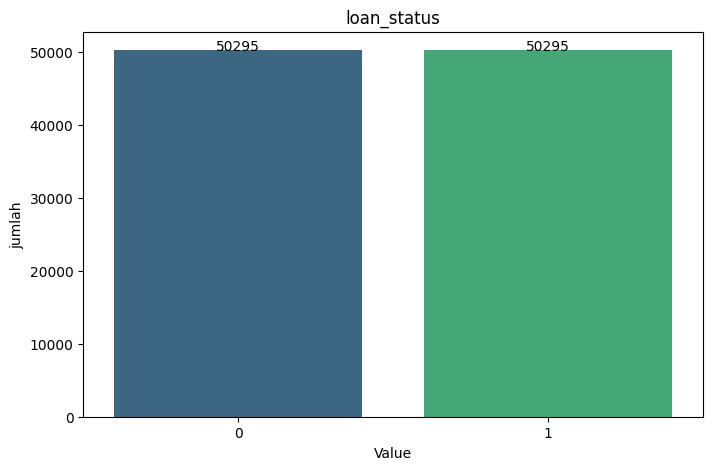

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
count_values = df_resampled['loan_status'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=count_values.index, y=count_values.values, palette='viridis')
plt.title('loan_status')
plt.xlabel('Value')
plt.ylabel('jumlah')
for i, v in enumerate(count_values.values):
    plt.text(i, v + 0.1, str(v), ha='center')

plt.show()